# Zoo Animal Classification

## Importing required modules

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import numpy as np
import statistics
import pandas as pd

## Getting dataset

In [35]:
df = pd.read_csv("data/proj76/zoo_animals.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Cleaning dataset

In [36]:
df.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

## Exploring dataset

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df.iloc[:, :-1]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
96,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
97,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
98,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0


<AxesSubplot:xlabel='animal_name', ylabel='Classificaion'>

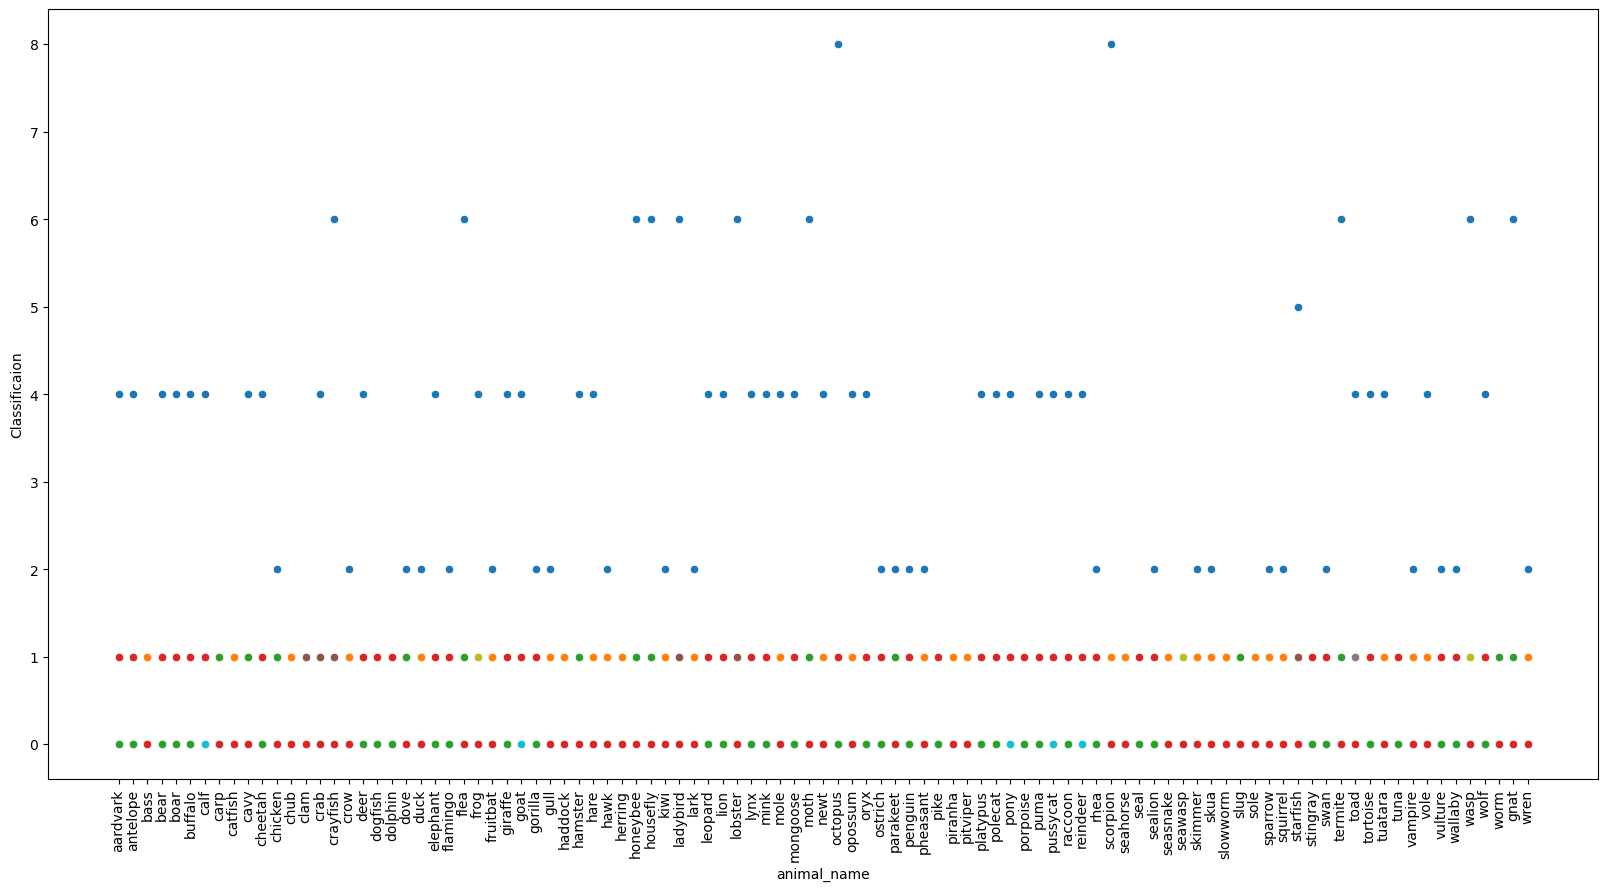

In [39]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)

plt.ylabel("Classificaion")

sns.scatterplot(x="animal_name", y="hair", data=df)
sns.scatterplot(x='animal_name', y='feathers', data=df)
sns.scatterplot(x='animal_name', y='eggs', data=df)
sns.scatterplot(x='animal_name', y='milk', data=df)
sns.scatterplot(x='animal_name', y='aquatic', data=df)
sns.scatterplot(x='animal_name', y='predator', data=df)
sns.scatterplot(x='animal_name', y='toothed', data=df)
sns.scatterplot(x='animal_name', y='backbone', data=df)
sns.scatterplot(x='animal_name', y='venomous', data=df)
sns.scatterplot(x='animal_name', y='fins', data=df)
sns.scatterplot(x='animal_name', y='legs', data=df)
sns.scatterplot(x='animal_name', y='tail', data=df)
sns.scatterplot(x='animal_name', y='domestic', data=df)
sns.scatterplot(x='animal_name', y='catsize', data=df)

## Pre-Processing dataset

In [40]:
le = LabelEncoder()
df["animal_name"] = le.fit_transform(df["animal_name"])
print(le.classes_)


X = df.drop("class_type", axis=1)
y = df["class_type"] - 1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']


## Training the model

In [41]:
xclf = XGBClassifier()
xclf.fit(X_train.values, y_train.values)
xclf.score(X_test.values, y_test.values)

0.95